In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
from scipy.spatial.distance import cdist
import pickle
import cartopy.crs as ccrs
import cartopy.feature as cfeat
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.io.shapereader import Reader
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.image as mpimg
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)

In [4]:
#-------------------------------生成预定义邻接矩阵--------------------------
file_dir = '../preAdj_generate/location.csv'
out_dir = '..'

# 计算距离矩阵
location = pd.read_csv(file_dir)[['lat','lon']].values
adj_mx =  cdist(location, location, metric='euclidean')

# 选择σ，例如使用距离的中位数
sigma = np.median(adj_mx)

# 设定τ，例如选择距离的75%分位数
tau = np.percentile(adj_mx, 75)

# 构建邻接矩阵
adj_mx = np.exp(-adj_mx ** 2 / (2 * sigma ** 2)) * (adj_mx < tau)
print(adj_mx)
# # 将adj_mx保存为pkl文件
# with open('{}/adj_mx.pkl'.format(out_dir), 'wb') as f:
#     pickle.dump(adj_mx, f)

[[1.         0.92251784 0.7497695  0.89629764 0.51762599 0.48296585
  0.37688139 0.         0.6394371  0.82473387 0.47184986]
 [0.92251784 1.         0.77484765 0.94366446 0.69367264 0.45883418
  0.41440797 0.         0.78985142 0.92841826 0.47610156]
 [0.7497695  0.77484765 1.         0.58346062 0.8107453  0.
  0.         0.         0.38450901 0.54673707 0.88055691]
 [0.89629764 0.94366446 0.58346062 1.         0.50363101 0.66197271
  0.60653066 0.         0.89030193 0.98538192 0.        ]
 [0.51762599 0.69367264 0.8107453  0.50363101 1.         0.
  0.         0.         0.43302301 0.52633718 0.67614331]
 [0.48296585 0.45883418 0.         0.66197271 0.         1.
  0.92890265 0.62746395 0.67491721 0.64783695 0.        ]
 [0.37688139 0.41440797 0.         0.60653066 0.         0.92890265
  1.         0.79199864 0.7389913  0.63387517 0.        ]
 [0.         0.         0.         0.         0.         0.62746395
  0.79199864 1.         0.39103569 0.         0.        ]
 [0.6394371  0.7

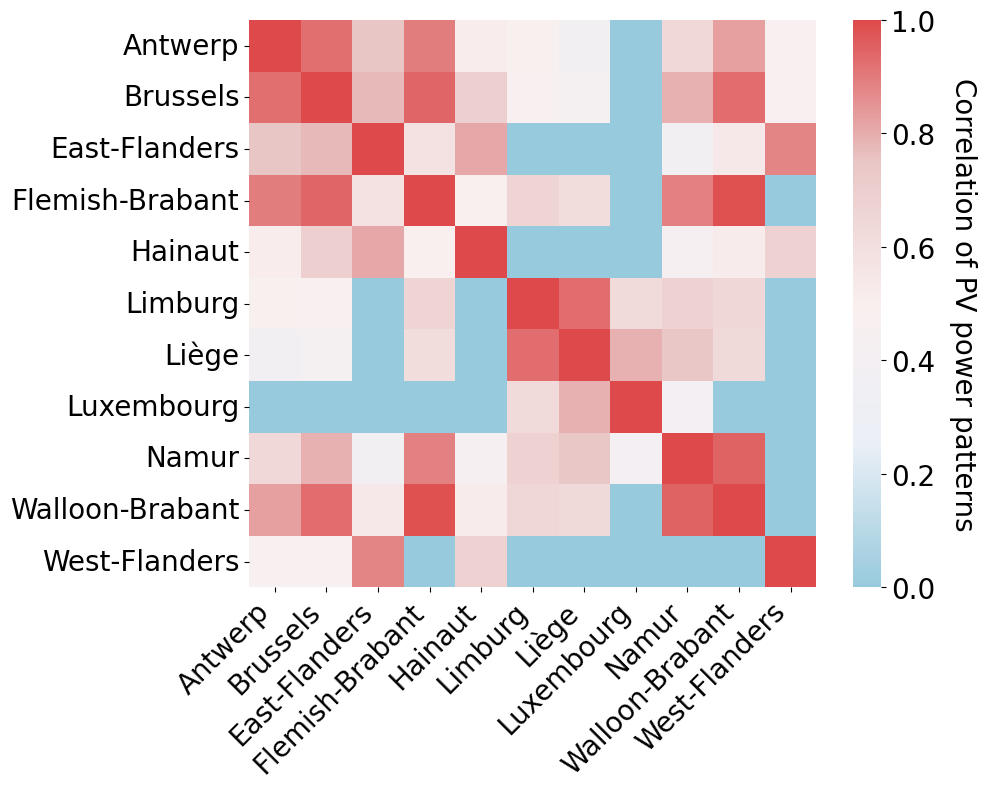

In [6]:
# 定义颜色列表
from matplotlib.colors import LinearSegmentedColormap
colors = ['#98CADD','#EAEFF6','#F9EFEF','#E9C6C6','#de4a4b' ] 
site_names = ['Antwerp','Brussels','East-Flanders','Flemish-Brabant','Hainaut','Limburg','Liège','Luxembourg','Namur','Walloon-Brabant','West-Flanders']
# colors.reverse()'#61AACF',
# 创建颜色映射
cmap = LinearSegmentedColormap.from_list('custom', colors)
# 绘制图像
plt.figure(figsize=(10, 8))
ax = sns.heatmap(adj_mx,xticklabels=site_names,yticklabels=site_names,cmap=cmap,square=True)
# 设置 X 轴和 Y 轴标签的字体大小
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=20)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=20)
# 获取颜色条对象
cbar = ax.collections[0].colorbar
cbar.ax.set_ylabel('Correlation of PV power patterns', rotation=270,fontsize=20,labelpad=30)
# 设置颜色条刻度标签字体大小
cbar.ax.tick_params(labelsize=20)
# 调整布局，防止标签被截断
plt.tight_layout()
ax.figure.savefig('../preAdj_generate/adj.png',dpi=400)